In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_auc_score , roc_curve, auc
from sklearn.calibration import CalibrationDisplay, calibration_curve
import sys
import os

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from Basic_model import Centiles_plot, ROC_plot, cumulative_centiles_plot

In [2]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install comet_ml

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv('../data/derivatives/features_train1.csv')

In [5]:
X = data['distance_goal']
y = data['is_goal']
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
        )

In [6]:
# LogisticRegression prend des shape de (n,)
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
reshaped_X_val = X_val.values.reshape(-1,1)
reshaped_y_val = y_val.values.reshape(-1,1)

### Régression logistique entrainée sur la caractéristique 'Distance' uniquement

In [7]:
clf = LogisticRegression().fit(X_train, y_train)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Précsion du model

In [8]:
y_pred = clf.predict(reshaped_X_val)

# Calculer la précision du modèle
accuracy = accuracy_score(reshaped_y_val, y_pred)
print(accuracy)

0.9063440156965337


In [9]:
y_score = clf.predict_proba(reshaped_X_val)
print(y_score)
# la première colonne est la probabilité que le model ne prédit pas un but pour la ligne d'entrée correspondante
# la deuxieme colonne est la probabilté que le model ne prédit un but pour la ligne d'entrée correspondante

[[0.92153203 0.07846797]
 [0.81128786 0.18871214]
 [0.81487383 0.18512617]
 ...
 [0.80070587 0.19929413]
 [0.94460124 0.05539876]
 [0.91431257 0.08568743]]


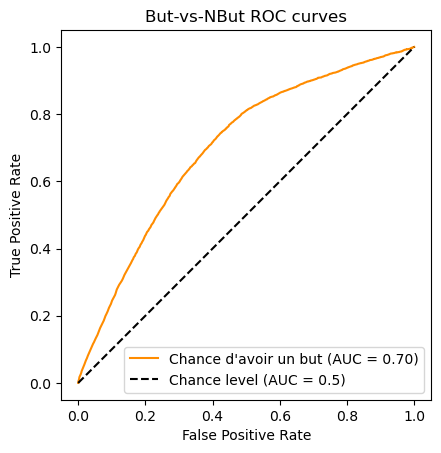

AUC metric : 0.6996024836610925


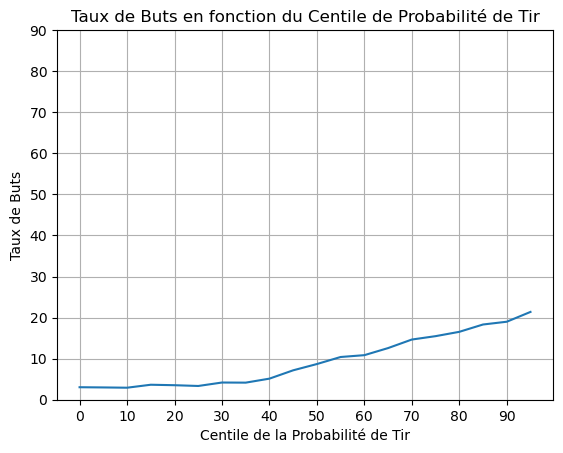

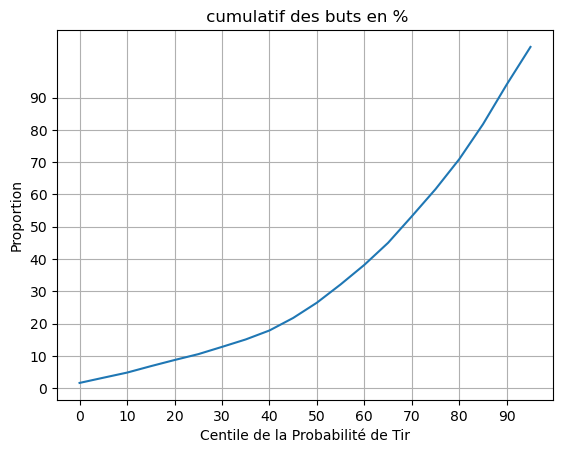

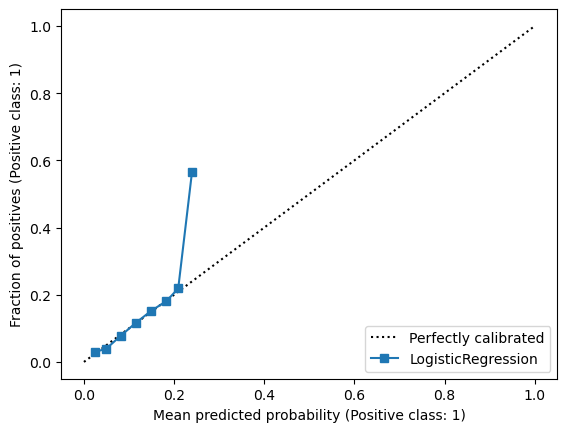

In [10]:
# on s'intéresse à la deuxième colonne y_score[:,1] qui représente la probabilité de prédire un but

# Receiver Operating Characteristic
ROC_plot(y_val, y_score[:,1])

# Taux de buts
Centiles_plot(y_val, y_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y_val, y_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf,reshaped_X_val, reshaped_y_val, n_bins=30)

### Régression logisrique entrainnée sur la caractéristique 'Angle' uniquement

In [11]:
X_1 = data['angle_goal']
X1_train, X1_val, y1_train, y1_val = train_test_split(
        X_1, y, test_size=0.2, random_state=42
        )

X1_train = X1_train.values.reshape(-1,1)
y1_train = y1_train.values.reshape(-1,1)
reshaped_X1_val = X1_val.values.reshape(-1,1)
reshaped_y1_val = y1_val.values.reshape(-1,1)

clf_1 = LogisticRegression().fit(X1_train, y1_train)

y1_score = clf_1.predict_proba(reshaped_X1_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


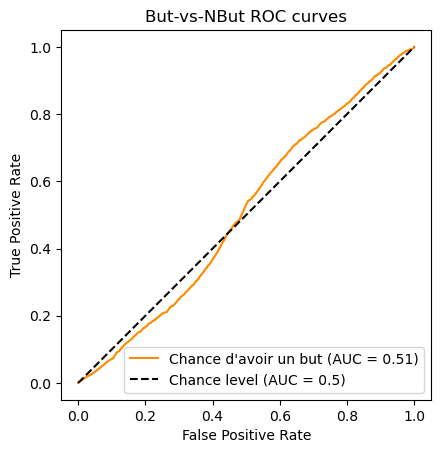

AUC metric : 0.5057290770119673


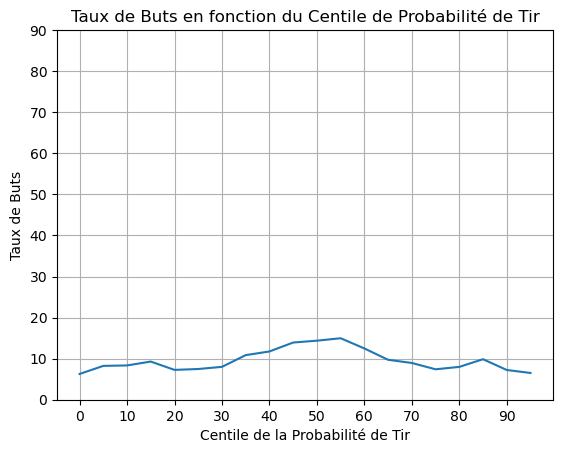

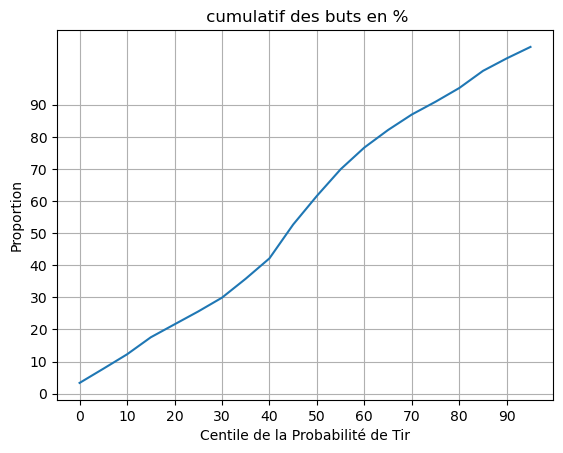

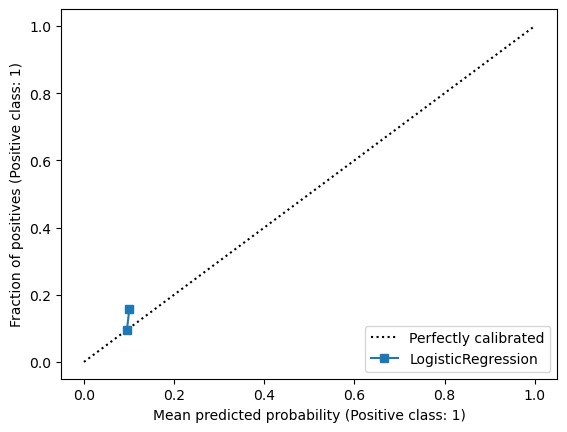

In [12]:

# Receiver Operating Characteristic
ROC_plot (y1_val, y1_score[:,1])

# Taux de buts
Centiles_plot(y1_val, y1_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y1_val, y1_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf_1,reshaped_X1_val, reshaped_y1_val, n_bins=10)

### Régression logistique entrainée sur les caractéristique 'distance' et 'Angle' 

In [13]:
X_2 = data[['distance_goal','angle_goal']]
X2_train, X2_val, y2_train, y2_val = train_test_split(
        X_2, y, test_size=0.2, random_state=42
        )
y2_train = y2_train.values.reshape(-1,1)
reshaped_y2_val = y2_val.values.reshape(-1,1)
clf_2 = LogisticRegression().fit(X2_train, y2_train)
y2_score = clf_2.predict_proba(X2_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


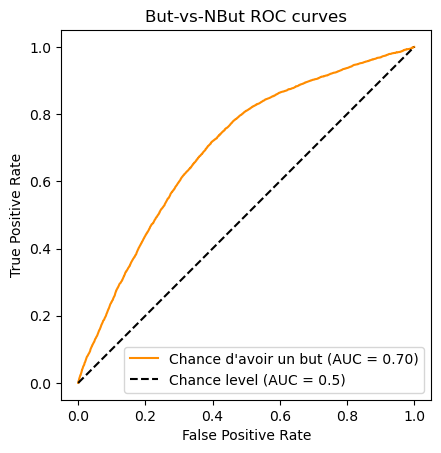

AUC metric : 0.6997354775890294


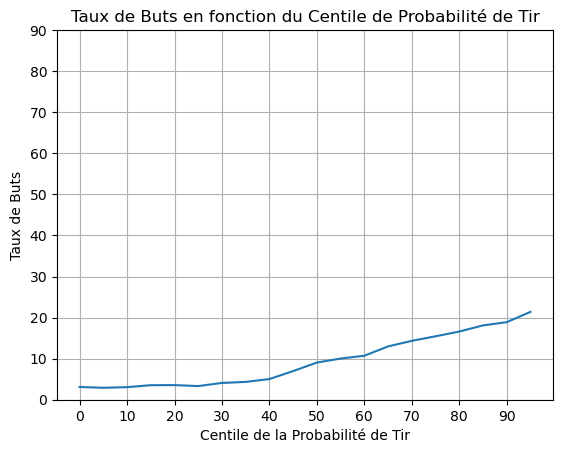

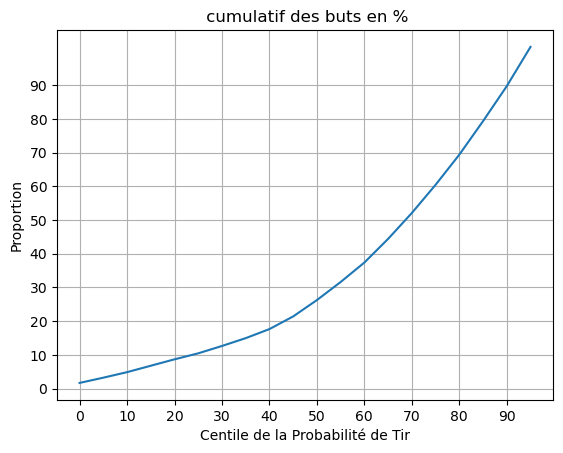

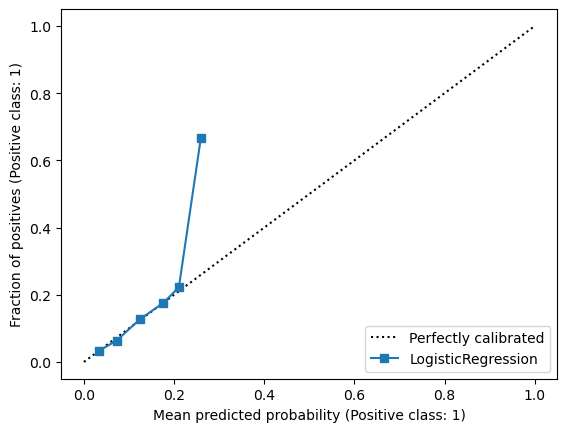

In [14]:
# Receiver Operating Characteristic
ROC_plot (y2_val, y2_score[:,1])

#Taux de buts
Centiles_plot(y2_val, y2_score[:,1])

# Cumule de buts
cumulative_centiles_plot(y2_val, y2_score[:,1])

# Courbe de calibration
CalibrationDisplay.from_estimator(clf_2,X2_val, reshaped_y2_val, n_bins=20)

### Régression logistique avec échantillonage uniforme

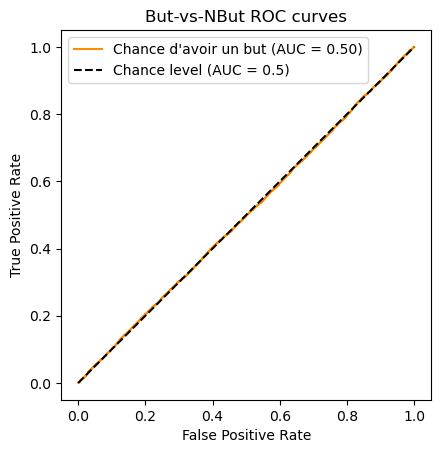

AUC metric : 0.49932409385176546


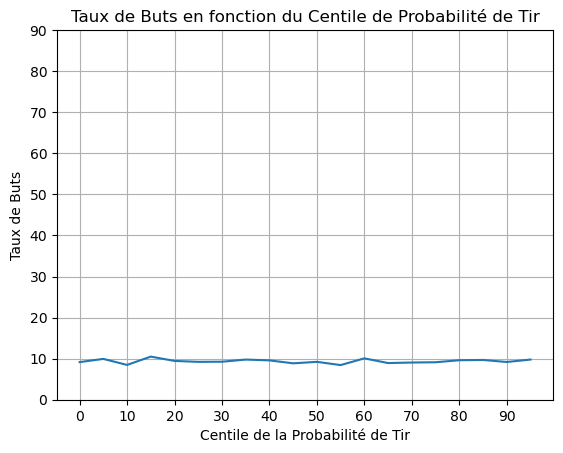

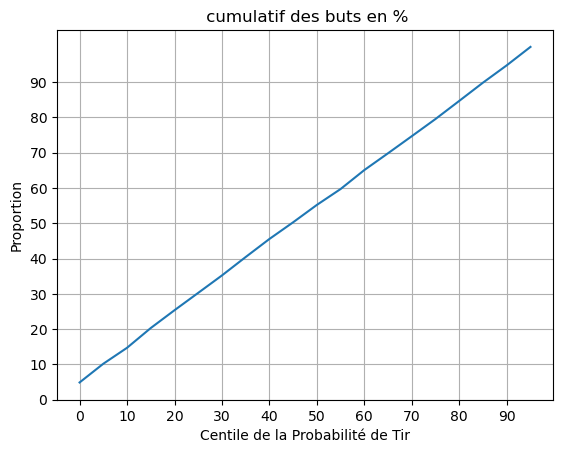

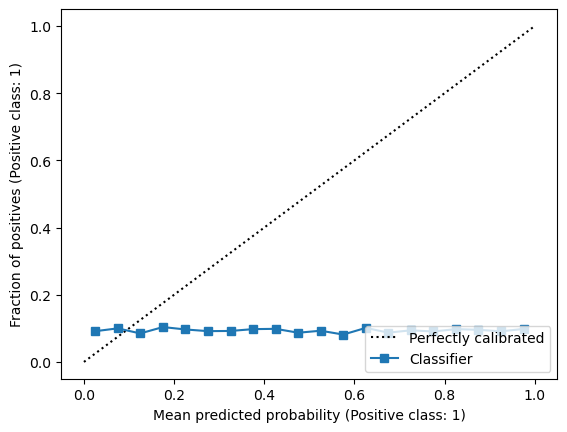

In [15]:
# Échantillonnage des probabilités prédites à partir d'une distribution uniforme U(0, 1)

y_uniform_sampled = np.random.uniform(0, 1, len(y2_score[:,1]))

# Receiver Operating Characteristic
ROC_plot (y2_val, y_uniform_sampled)

#Taux de buts
Centiles_plot(y2_val, y_uniform_sampled)

# Cumule de buts
cumulative_centiles_plot(y2_val, y_uniform_sampled)

# Courbe de calibration
CalibrationDisplay.from_predictions(y2_val, y_uniform_sampled, n_bins=20)

In [20]:
print(os.environ["COMET_API_KEY"])

KeyError: 'COMET_API_KEY'

In [19]:
import openai
 
openai.api_key = os.environ["COMET_API_KEY"]

KeyError: 'COMET_API_KEY'

In [18]:
import comet_ml

experiment1 = comet_ml.Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name='Milestone_2',
    workspace= 'me-pic'
    )

experiment1.log_model(clf, name="Regression logistique entrainé sur la distance")

experiment2 = comet_ml.Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name='Milestone_2',
    workspace= 'me-pic'
    )

experiment2.log_model(clf_1, name="Regression logistique entrainé sur l'angle")

experiment3 = comet_ml.Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name='Milestone_2',
    workspace= 'me-pic'
    )       

experiment3.log_model(clf_2, name="Regression logistique entrainé sur la distance et l'angle")

exp_id_1 = experiment1.id
exp_id_2 = experiment2.id
exp_id_3 = experiment3.id

ValueError: Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 

In [ ]:
comet_api = comet_ml.API(api_key = os.environ.get('COMET_API_KEY'), workspace='me-pic')

# Récupérez les liens vers les entrées d'expérience
link_exp_1 = f"https://www.comet.ml/{comet_api.workspace}/{comet_api.project}/{exp_id_1}"
link_exp_2 = f"https://www.comet.ml/{comet_api.workspace}/{comet_api.project}/{exp_id_2}"
link_exp_3 = f"https://www.comet.ml/{comet_api.workspace}/{comet_api.project}/{exp_id_3}"

# Ajoutez ces liens à votre projet Comet.ml
comet_api.add_project_link("Lien vers expérience 1", link_exp_1)
comet_api.add_project_link("Lien vers expérience 2", link_exp_2)
comet_api.add_project_link("Lien vers expérience 3", link_exp_3)